In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
# import fortranfile as ff
from os import listdir

import sys
sys.path.append("../")

import galomatch

%load_ext autoreload
%autoreload 2

from copy import copy

In [2]:
simpath = galomatch.io.get_sim_path(9844)

In [3]:
arr = galomatch.io.read_clumps(1016, simpath)
galomatch.io.convert_mass_cols(arr, "mass_cl")
galomatch.io.convert_position_cols(arr, ["peak_x", "peak_y", "peak_z"])

In [12]:
arr["peak_x"]

array([298.56982526, 330.92112924, 322.92393181, ..., 671.12820648,
       340.09090577, 354.01700821])

<IPython.core.display.Javascript object>


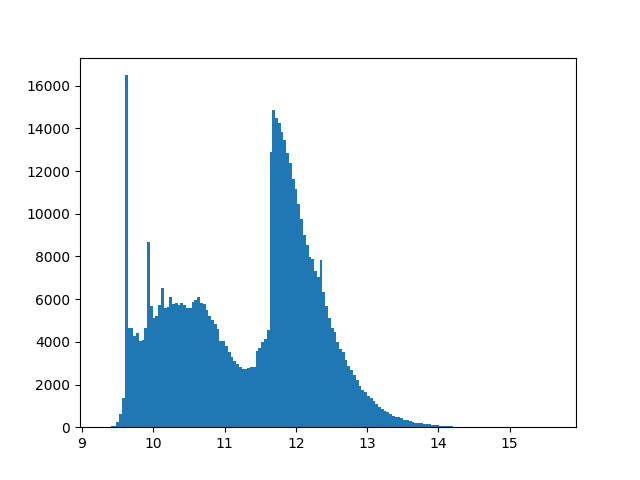

In [20]:
plt.figure()
# plt.scatter(arr["peak_x"], arr["peak_y"], s=0.00001)

plt.hist(np.log10(arr["mass_cl"]), bins="auto")

plt.show()